
# TP 2.1 - Problème de claquage de deux barres articulées

![alt text](figs/2_barres_sur_ressortupdate.png "Logo Title Text 1")
On considère le système de barres articulèes représenté en  figure. 

A l'etat initial, le point d'articulation P entre les 2 barres est situé à une hauteur $h = 0.5$ m et une distance $b = 10$ m par rapport aux 2 extrémités. Au repos, ces barres élastiques et extensibles ont une longueur $\ell_0$, un module d'Young $E$ et une section $A$ tel que $EA = 5$ MN. La variable $\phi$ est l'angle de rotation des barres avec le plan horizontal. Enfin, en P, le système repose sur un ressort linéaire vertical de raideur $2k$.


On applique en P une force $2F$ verticale  de manière quasi-statique et on s'intéresse à la valeur du déplacement $v$ en ce point. A cause des symétries du problème, le déplacement du point P se réduit à sa seule composante $v$. Sous l'effet du chargement, les $2$ barres ont une nouvelle longueur $\ell$ dans la configuration déformée.


I - Formulation du problème et solution analytique à déplacement imposé
===================================================================

La déformation axiale dans chaque barre peut s'écrire 
$$e(v)=\frac{\ell(v)}{l_0} +-1 
$$
où
$$
\ell(v) = \sqrt{b^2 + (h - v)^2}
$$

1. Montrez que l'énergie potentielle du système est donnée par
$$\mathcal{E}(v) = {EA}\,\ell_0\left(\dfrac{\ell(v)}{\ell_0}-1\right)^2 + k v^2 -2 \,Fv$$
et que 
\begin{eqnarray}
\mathcal{E}'(v) &=& - 2F -2EA\,({h-v})\left(\frac{1}{\ell_0} -\frac{1}{\ell(v)}\right)+ 2kv\\
\mathcal{E}''(v)&=& 2EA \left(\frac{1}{\ell_0}-\frac{1}{\ell(v)}\right) + 2{EA}\,\frac{(h-v)^2}{\ell(v)^3} + 2k\\
\end{eqnarray}

2.  Montrer que l'équation d'équilibre du système dans ce cas peut s'écrire sur la forme:
    $$
    f(v)-F=0.
    $$
    Donner l'expression de la fonction $f(v)$. Cela donne une solution explicite de la force à l'équilibre en fonction du déplacement.

3. En utilisant la librairie Matplotlib:
    1. Tracez la courbe Force-Déplacement, $f(v)$, pour $0 < v < 1.2$ m, et ce pour
différentes valeurs de $k = [0, \, 200, \, 500, \, 800, \, 1000]$ N/m.

    2. Tracez la fonction $\mathcal{E}(v)$ pour
$0 < v < 1.2$ m et $F = 200$ N, et ce pour différentes valeurs de
$k = [0, \, 200, \, 500, \, 800, \, 1000]$ N/m.

    3. Que se passe-t-il mathématiquement et physiquement pour $k < 500$ N/m ?

Pour faciliter le travail les définitions des functions fondamentales sont données ci-dessous

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

EA = 1.0e+6
b = 10.0
h = 0.5
l0 = np.sqrt(b**2 + h**2)

def ell(v):
    "Current length of a bar"
    return np.sqrt(b**2+(h-v)**2)

def energy(v,F=0.,k=0.):
    "Energy"
    return EA*l0*(ell(v)/l0-1)**2 + k*v**2 - 2*F*v - 2*F 

def residual(v,F=0.,k=0.):
    "First derivative of the energy (and residual)"
    return -2*EA*(h - v)*(1/l0 - 1/ell(v)) + 2*k*v-2*F

def hessian(v,F=0.,k=0.):
    "Second derivative of the energy (and hessian)"
    return 2*k + 2*EA*(1/l0 - 1/ell(v)) + 2*EA*(h - v)**2/(ell(v)**3)

def equilibrium_force(v,k=0.):
    f = -EA*(h-v)*(1/l0 - 1/ell(v))+k*v
    return f

In [26]:
np.savetxt("file.txt",v)

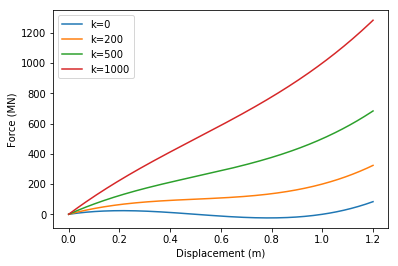

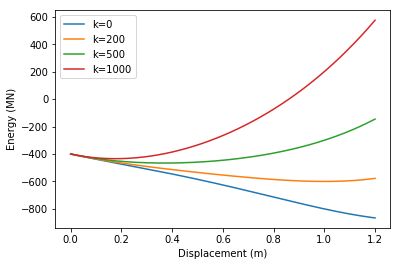

In [23]:
v = np.linspace(0.,1.2,210) 
plt.figure(0)
for k in [0,200,500,1000]:
    plt.plot(v,equilibrium_force(v,k=k),label="k=%s"%k)
plt.legend()
plt.xlabel("Displacement (m)")
plt.ylabel("Force (MN)")
plt.savefig("force-displacement.pdf")

plt.figure(1)
for k in [0,200,500,1000]:
    plt.plot(v,energy(v,F=200.,k=k),label="k=%s"%k)
plt.legend()
plt.xlabel("Displacement (m)")
plt.ylabel("Energy (MN)")
plt.savefig("energy-displacementF200.pdf")

In [77]:
def newton_raphson(v0=0.,tol=1.e-8):
    i = 0
    err = 1.
    v = v0
    while err>tol and i<1000:
        g = residual(v,F=F,k=k)
        h = hessian(v,F=F,k=k)
        v = v - g/h
        i += 1
        err = abs(g)
        print("Iteration n = {}:v_n = {:06.4e}, residual = {:06.4e}""".format(i,v, err))
    return v

# Alternative implementation
def newton(f,x0,jac,rtol=1.e-5,atol=1.e-5,maxiter=30,monitor=None):
    x = x0
    for i in range(maxiter):
        f_x = f(x)
        if monitor is not None:
            monitor(i, x, f_x)
        if abs(f_x) <= atol:
            return x
        jac_x = jac(x)
        dx = -f_x/jac(x)
        x += dx
    raise RuntimeError("Convergence not reached")


In [78]:
def my_monitor(iteration, iterate, residual):
    print('Iteration n = {}: v_n = {:06.4e}, residual = {:06.4e}'.format(iteration,iterate, residual))

In [79]:
def f(v):
    return residual(v, F=F, k=k)

In [80]:
f = lambda v: residual(v, F=F, k=k)
jac = lambda v: hessian(v, F=F, k=k)
x0 = 0.
u2 = newton(f=f,x0=0.,jac=jac,monitor=my_monitor)

Iteration n = 0: v_n = 0.0000e+00, residual = -4.0000e+02
Iteration n = 1: v_n = 1.6012e-01, residual = -3.4178e+01
Iteration n = 2: v_n = 1.7642e-01, residual = -2.6591e-01
Iteration n = 3: v_n = 1.7655e-01, residual = -1.6065e-05
Iteration n = 4: v_n = 1.7655e-01, residual = -3.7517e-12


Iteration n = 1:v_n = 1.6012e-01, residual = 4.0000e+02
Iteration n = 2:v_n = 1.7642e-01, residual = 3.4178e+01
Iteration n = 3:v_n = 1.7655e-01, residual = 2.6591e-01
Iteration n = 4:v_n = 1.7655e-01, residual = 1.6065e-05
Iteration n = 5:v_n = 1.7655e-01, residual = 3.7517e-12


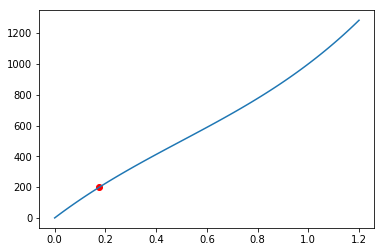

In [81]:
F = 200.
K = 1000.
plt.plot(newton_raphson(),F,"or")
v = np.linspace(0,1.2,100)
plt.plot(v,equilibrium_force(v,k=k))

II - Calcul numérique d'une solution l'équation d'équilibre par la méthode de Newton-Raphson
===========================================================================================


1. Écrire l'algorithme de
Newton-Raphson pour calculer une solution $v$ de $g(v,F) = 0$ (on
actualisera la dérivée $g'(v)$ à chaque pas de l'algorithme). Nous
chercherons le déplacement inconnu pour une force imposée $F = 200$ N
(on prendra $k = 1000$ N/m). Pour initialiser l'algorithme, on prendra
une valeur du déplacement initial $v_0 = 0$ m et une précision (ou
tolérance) $e = 10^{-8}$.

2. Reportez la solution $(v,F)$ obtenue sur la courbe $F = f(v)$ tracée
en 1.3) pour vérifier le calcul numérique.

3.  Tracez la déformée des deux barres articulées correspondant à la
solution $(v,F)$ obtenue.


III - Calcul numérique de la courbe Force-Déplacement
===============================================

1. En insérant la méthode de Newton-Raphson développée dans la partie précedente 
dans une boucle sur l'incrément de force $\Delta F$, calculez numériquement la
courbe Force-Déplacement pour $k = 1000$ N/m.  On commencera à $v_0 = 0$
m et $F = 0$ N et on prendra un incrément de charge $\Delta F = 1$ N
jusqu'à $F = 1000$ N. Pour chaque chargement, on calculera le
déplacement inconnu avec la méthode de Newton (toujours avec une
précision $e = 10^{-8}$ et on actualisera le déplacement initial à
chaque incrément de chargement). Reportez les points fixes calculés sur
la courbe tracée analytiquement.

2. On choisit maintenant une raideur $k = 0$ N/m pour $F\in[0,100]$. Que se passe-t-il numériquement et à quoi cela
correspond-t-il physiquement ?

IV - Expériences numériques
======================

1. Quelle est l'influence de la précision $e$ sur la solution $(v,F)$
calculée avec l'algorithme de Newton (on prendra $e$ jusqu'à $100$) ? Pour cela
on comparera la solution calculée $(v,F)$ avec la solution analytique
obtenue à déplacement imposé.

2. Quelle est l'influence de la valeur initiale $v_0$ sur le nombre
d'itération (ou convergence) de l'algorithme de Newton? 
On prendra par exemple $v_0 = 0.6$ ou $1$.

3. Pour une  raideur $k = 0$ N/m et et une
force $F = 18$ N, tracer la valeur de $v$ à l'équilibre obtenu par l'algortihme de 
newton en fonction de le $v0$ utilisé pour initialisé l'algorithme de Newton. Commentez les résultats. 

4. En utilisant la librairie Matplotlib, tracez l'évolution de l'énergie
$\mathcal{E}(v)$  pour $0 < v < 1.2$ m, $F = 100$
N et $k = 200$ N/m. Déterminez la stabilité des solutions trouvées à la
question 4. Pourquoi Newton-Raphson peut-t-il converger vers toutes les
solutions ? Quel algorithme faudrait-il utiliser pour réduire l'espace
des solutions recherchées aux solutions stables uniquement ?

5. Toujours pour $k = 200$ N/m, relancez l'algorithme de Newton  
et trouvez le déplacement inconnu pour une force imposée
$F = 200$. Pour initialiser l'algorithme, on prendra une valeur du
déplacement initial $v_0 = 0$ m et une précision (ou tolérance)
$e = 10^{-8}$. Modifiez alors l'algorithme de Newton en n'actualisant
pas la dérivée $g'(v)$ à chaque pas de l'algorithme. Comparez le nombre
d'itérations et la convergence des deux algorithmes.

6. En gardant les même paramètres qu'en 5., modifiez encore l'algorithme
de Newton en approximant numériquement la dérivée $g'(v)$ du résidu $g(v)=\mathcal{E}'(v)$ 
à chaque pas de l'algorithme selon :
$$g'(v) \approx \frac{g(v+h) - g(v)}{h} \qquad |h| \ll 1.$$ On prendra
d'abord $h = 0.01$ puis $h = 1\times10^{-6}$. Quelle est l'influence de
$h$ sur l'approximation de la dérivée de $g'(v)$ ?

7. Quelle est l'influence de la taille du pas de chargement $\Delta F$
sur la convergence de l'algorithme programmé à la question 3.1) (on
prendra $\Delta F = 1$, $10$ ou $100$ N)?


